In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots

import random
import math
import time

In [921]:
#Use this to fetch latest data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_covid19 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-27-2020.csv')

# General Data Analysis and Prep on COVID-19

In [286]:
# Preparing country wise data.
df_countries_cases = df_covid19.copy().drop(['Lat','Long_','Last_Update', 'Case-Fatality_Ratio','FIPS', 'Admin2' , 'Province_State','Combined_Key'],axis=1)
df_countries_cases.set_index(df_countries_cases['Country_Region'],inplace=True)
df_countries_cases = df_countries_cases.drop(['Country_Region'],axis=1)
df_countries_cases.fillna(0,inplace=True)

In [287]:
# Global Reported Cases till Date¶
df_t = pd.DataFrame(pd.to_numeric(df_countries_cases.sum()),dtype=np.float64).transpose()
df_t["Mortality Rate (per 100)"] = np.round(100*df_t["Deaths"]/df_t["Confirmed"],2)
df_t

,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Mortality Rate (per 100)
0,33079764.0,997734.0,22925667.0,9156500.0,6.475831e+06,3.02


In [288]:
# Country cases Reported Cases till Date¶
top_confirmed = df_countries_cases.groupby(['Country_Region']).Confirmed.sum().sort_values(ascending=False)
top_confirmed[:50]

Country_Region
US                      7115008
India                   6074702
Brazil                  4732309
Russia                  1146273
Colombia                 813056
Peru                     800142
Mexico                   730317
Spain                    716481
Argentina                711325
South Africa             670766
France                   552473
Chile                    457901
Iran                     446448
United Kingdom           437517
Bangladesh               359148
Iraq                     349450
Saudi Arabia             333193
Turkey                   314433
Pakistan                 310841
Italy                    309870
Philippines              304226
Germany                  286339
Indonesia                275213
Israel                   231026
Ukraine                  203799
Canada                   155428
Ecuador                  134747
Bolivia                  133901
Qatar                    125084
Romania                  122673
Morocco                  

<AxesSubplot:ylabel='Country_Region'>

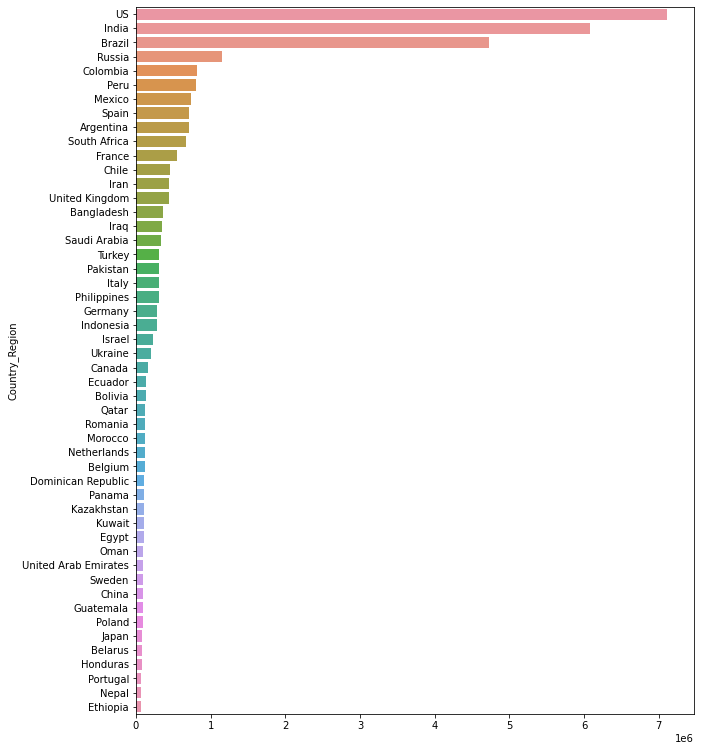

In [289]:
# Plotting TOP 50 countries with most cases so far
fix, ax = plt.subplots(figsize=(10,13))
sns.barplot(y=top_confirmed.index[:50],x=top_confirmed.values[:50])

# COVID-19: Time Series Data Analysis

In [720]:
# Get dates
dates = confirmed_df.keys()[4:]

# Set up data - Dataset presents cumulative data
confirmed = confirmed_df.loc[:,dates]
deaths = deaths_df.loc[:,dates]
recoveries = recoveries_df.loc[:,dates]

In [721]:
# This sums total cases, deaths and recoveries from the date range in the dataset
total_cases = confirmed.sum(axis=0).values
total_deaths = deaths.sum(axis=0).values
total_recoveries = recoveries.sum(axis=0).values

In [722]:
# This method gets unique data for the each day.
def daily_values(data):
    d=[]
    d.append(data[0])
    for i in range (1, len(data)):
        d.append(data[i]-data[i-1])
    return d

In [723]:
# This method gets uthe weekly average of cconfirmed cases
def weekly_average(data):
    weekly_average = []
    for i in range(len(data)):
        if i + 7 < len(data):
            weekly_average.append(np.mean(data[i:i+7]))
        else:
            weekly_average.append(np.mean(data[i:len(data)]))
    return weekly_average

In [724]:
# Days array
days = np.array(range(len(dates))).reshape(-1, 1)

# Daily confirmed Cases & Weekly Average of cases
global_daily_cases = daily_values(total_cases)
global_daily_avg_increase = weekly_average(global_daily_cases)

# Daily confirmed deaths & Weekly Average of deaths
global_daily_deaths = daily_values(total_deaths)
global_daily_avg_increase_deaths = weekly_average(global_daily_deaths)

# Daily confirmed recoveries & Weekly Average of recoveries
global_daily_recoveries = daily_values(total_recoveries)
global_daily_avg_increase_recoveries = weekly_average(global_daily_recoveries)

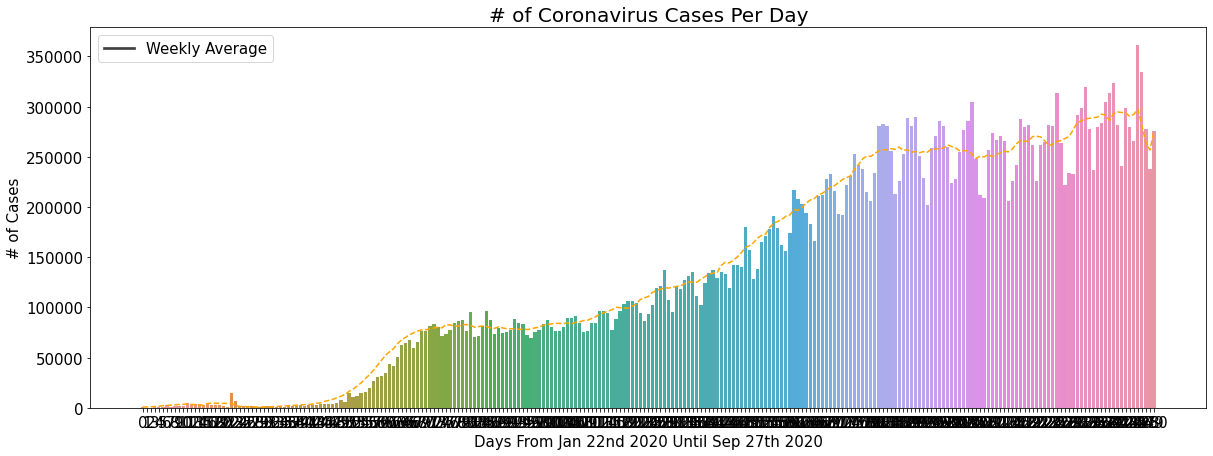

In [725]:
# Plotting number of daily cases per day of COVID-19
fig, ax = plt.subplots(figsize=(20, 7))
sns.barplot(x = list(range(len(global_daily_cases))),y = global_daily_cases)

plt.plot(days, global_daily_avg_increase, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Per Day', size=20)
plt.xlabel('Days From Jan 22nd 2020 Until Sep 27th 2020', size=15)
plt.ylabel('# of Cases', size=15)
plt.legend(['Weekly Average'], prop={'size': 15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

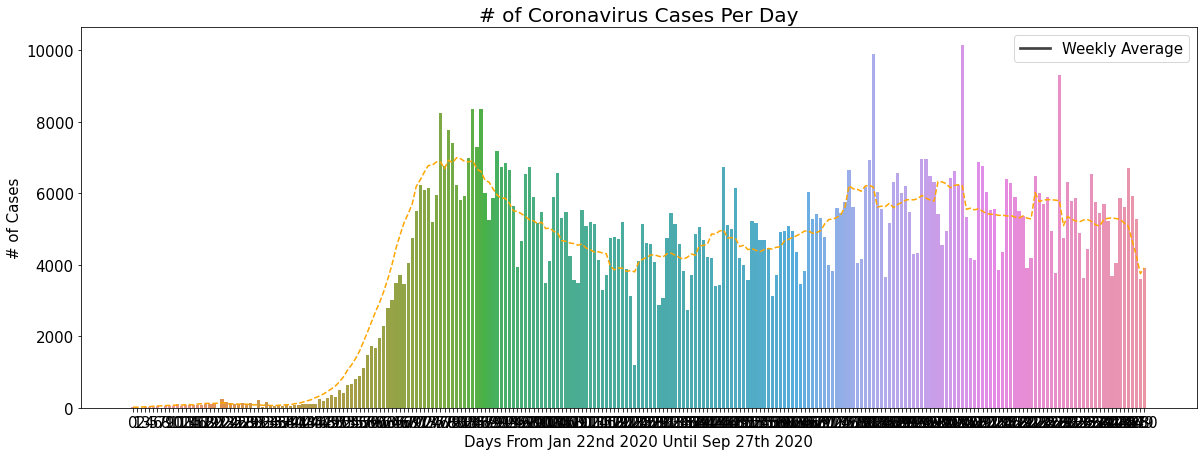

In [296]:
# Plotting number of daily deaths per day of COVID-19

fig1, ax = plt.subplots(figsize=(20, 7))

sns.barplot(x = list(range(len(global_daily_deaths))),y = global_daily_deaths)
plt.plot(days, global_daily_avg_increase_deaths, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Per Day', size=20)
plt.xlabel('Days From Jan 22nd 2020 Until Sep 27th 2020', size=15)
plt.ylabel('# of Cases', size=15)
plt.legend(['Weekly Average'], prop={'size': 15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

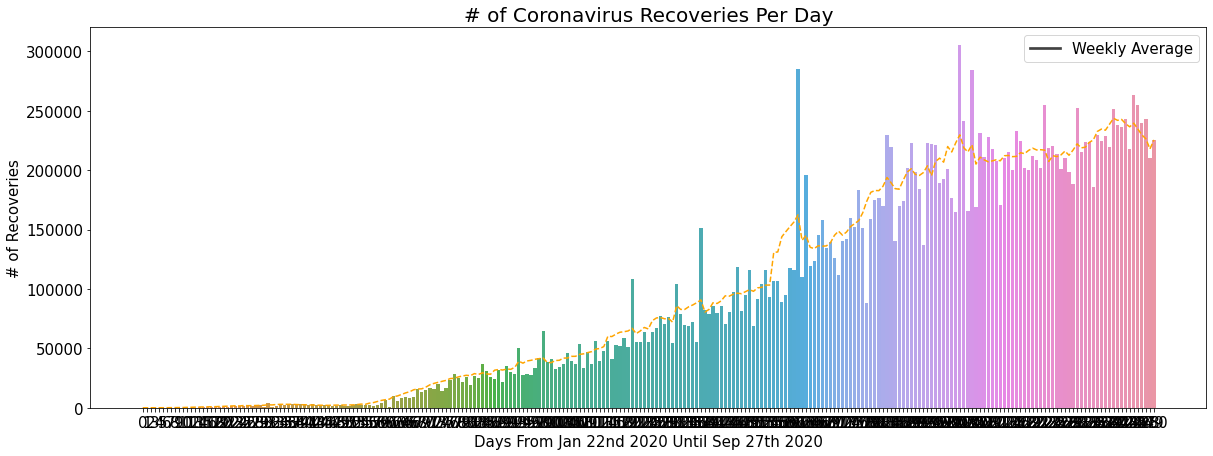

In [297]:
# Plotting number of daily recoveries per day of COVID-19

fig2, ax = plt.subplots(figsize=(20, 7))

sns.barplot(x = list(range(len(global_daily_recoveries))),y = global_daily_recoveries)
plt.plot(days, global_daily_avg_increase_recoveries, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Recoveries Per Day', size=20)
plt.xlabel('Days From Jan 22nd 2020 Until Sep 27th 2020', size=15)
plt.ylabel('# of Recoveries', size=15)
plt.legend(['Weekly Average'], prop={'size': 15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# AIESEC DATA: Sign ups, Approvals, Realizations

In [854]:
# Loading Sign up Data
signups = pd.read_csv('/Users/thaleslopes/Documents/workspace/AI/Jupyter Notebooks/covid19-impact-analysis/sign_ups_covid_analysis.csv').drop(['EP ID','Home LC','Home Region'],axis=1)
signups['Sign up date']= pd.to_datetime(signups['Sign up date'])

# Loading Approvals Data
daal_apd = pd.read_csv('/Users/thaleslopes/Documents/workspace/AI/Jupyter Notebooks/covid19-impact-analysis/approvals_covid_analysis.csv').drop(['EP ID','Home LC','Home Region','Host LC', 'Host MC','Host Region', 'Date signed up', 'Date realized'],axis=1)
daal_apd['Date approved']= pd.to_datetime(daal_apd['Date approved']).dt.date

# Loading Realizations Data
daal_re = pd.read_csv('/Users/thaleslopes/Documents/workspace/AI/Jupyter Notebooks/covid19-impact-analysis/realizations_covid_analysis.csv').drop(['EP ID','Home LC','Home Region','Host LC', 'Host MC','Host Region', 'Date signed up', 'Date approved'],axis=1)
daal_re['Date realized']= pd.to_datetime(daal_re['Date realized']).dt.date

In [855]:
signups

,Sign up date,Home MC,Age,Gender,Interest in GV,Interest in GTa,Interest in GTe,Interest in GT,Interest in GE
0,2020-01-22,Turkey,NaN,NaN,False,True,False,False,False
1,2020-01-22,Canada,22.74,male,False,True,False,False,False
2,2020-01-22,Colombia,NaN,NaN,True,False,False,False,False
3,2020-01-22,Canada,NaN,NaN,True,False,False,False,False
4,2020-01-22,Indonesia,20.95,female,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
212141,2020-09-28,Panama,NaN,NaN,False,False,False,False,False
212142,2020-09-28,United Kingdom,NaN,NaN,False,False,False,False,False
212143,2020-09-28,Colombia,NaN,NaN,False,False,False,False,False
212144,2020-09-28,Ecuador,NaN,NaN,True,False,False,False,False


In [856]:
top_signups = signups.groupby(['Home MC']).count().sort_values('Sign up date',ascending=False).drop(['Gender'],axis=1).rename(columns={'Sign up date': 'Sign ups'})
top_signups['Age'] = signups.groupby(['Home MC'])['Age'].mean().round(2)
top_signups['GV'] = signups.groupby(['Home MC'])['Interest in GV'].sum()
top_signups['GTa'] = signups.groupby(['Home MC'])['Interest in GTa'].sum()
top_signups['GTe'] = signups.groupby(['Home MC'])['Interest in GTe'].sum()
top_signups['GT'] = signups.groupby(['Home MC'])['Interest in GT'].sum()
top_signups['GE'] = signups.groupby(['Home MC'])['Interest in GE'].sum()
top_signups['No interest'] = top_signups['Sign ups'] - (top_signups['GV'] + top_signups['GTa'] + top_signups['GTe'] + top_signups['GT'] + top_signups['GE'])
top_signups.drop(['Interest in GV','Interest in GTa','Interest in GTe','Interest in GT','Interest in GE'],inplace= True, axis=1)
top_signups

,Sign ups,Age,GV,GTa,GTe,GT,GE,No interest
Home MC,,,,,,,,
Brazil,30504,31.31,15885,8443,38,12,3686,2440
India,16231,23.47,5908,5744,162,1,3523,893
Mexico,12052,28.83,2655,1840,78,1,416,7062
Egypt,11555,42.68,3944,2556,113,1,1445,3496
Colombia,10794,25.38,4971,2845,89,2,628,2259
...,...,...,...,...,...,...,...,...
Laos,3,23.42,1,0,0,0,0,2
Niger,3,23.13,0,2,0,0,1,0
Tajikistan,2,21.16,1,1,0,0,0,0


In [857]:
daal_apd

,Home MC,Date approved
0,Mainland of China,2020-03-05
1,Mainland of China,2020-03-05
2,Nigeria,2020-02-10
3,Ghana,2020-03-14
4,Brazil,2020-02-03
...,...,...
11317,Costa Rica,2020-09-28
11318,India,2020-09-28
11319,India,2020-09-28
11320,Brazil,2020-09-28


In [858]:
daal_re

,Home MC,Date realized
0,India,2020-03-12
1,Argentina,2020-03-12
2,Tunisia,2020-03-17
3,Peru,2020-02-14
4,Argentina,2020-01-24
...,...,...
3062,Colombia,2020-09-28
3063,Colombia,2020-09-28
3064,Mexico,2020-09-17
3065,Peru,2020-09-28


In [859]:
top_apd = daal_apd.groupby(['Home MC']).count().rename(columns={'Date approved': 'Approvals'})
top_apd

,Approvals
Home MC,
Albania,15
Algeria,382
Argentina,365
Armenia,5
Australia,3
...,...
United Arab Emirates,1
United Kingdom,31
United States,23


In [860]:
top_re = daal_re.groupby(['Home MC']).count().rename(columns={'Date realized': 'Realizations'})
top_re

,Realizations
Home MC,
Albania,6
Algeria,74
Argentina,101
Armenia,7
Australia,15
...,...
United Kingdom,18
United States,9
Uruguay,4


In [861]:
df_operations = top_signups.merge(top_apd, how='left', left_index=True, right_index=True).merge(top_re, how='left', left_index=True, right_index=True)
df_operations

,Sign ups,Age,GV,GTa,GTe,GT,GE,No interest,Approvals,Realizations
Home MC,,,,,,,,,,
Brazil,30504,31.31,15885,8443,38,12,3686,2440,2086.0,367.0
India,16231,23.47,5908,5744,162,1,3523,893,511.0,82.0
Mexico,12052,28.83,2655,1840,78,1,416,7062,832.0,101.0
Egypt,11555,42.68,3944,2556,113,1,1445,3496,637.0,96.0
Colombia,10794,25.38,4971,2845,89,2,628,2259,652.0,230.0
...,...,...,...,...,...,...,...,...,...,...
Laos,3,23.42,1,0,0,0,0,2,NaN,NaN
Niger,3,23.13,0,2,0,0,1,0,NaN,NaN
Tajikistan,2,21.16,1,1,0,0,0,0,NaN,NaN


In [862]:
# Getting top 50 in sign ups, approvals and realizations
top_signups.iloc[:50]['Sign ups'].sort_values(ascending=False)
top_apd.iloc[:50]['Approvals'].sort_values(ascending=False)
top_re.iloc[:50]['Realizations'].sort_values(ascending=False)

Home MC
Brazil                367
Colombia              230
Japan                 122
Germany               108
Argentina             101
Ecuador               100
Egypt                  96
India                  82
Algeria                74
Indonesia              71
Italy                  47
Belgium                31
Bolivia                31
Chile                  26
Canada                 24
Georgia                23
France                 19
Hungary                17
Australia              15
Greece                 13
Cote D'Ivoire          12
Costa Rica             12
Austria                10
Bangladesh              9
Czech Republic          9
Azerbaijan              8
Jordan                  8
Guatemala               7
Armenia                 7
Ghana                   6
Albania                 6
El Salvador             5
Kazakhstan              4
Cameroon                4
Ethiopia                4
Bahrain                 3
Cambodia                3
Benin                   3
Denm

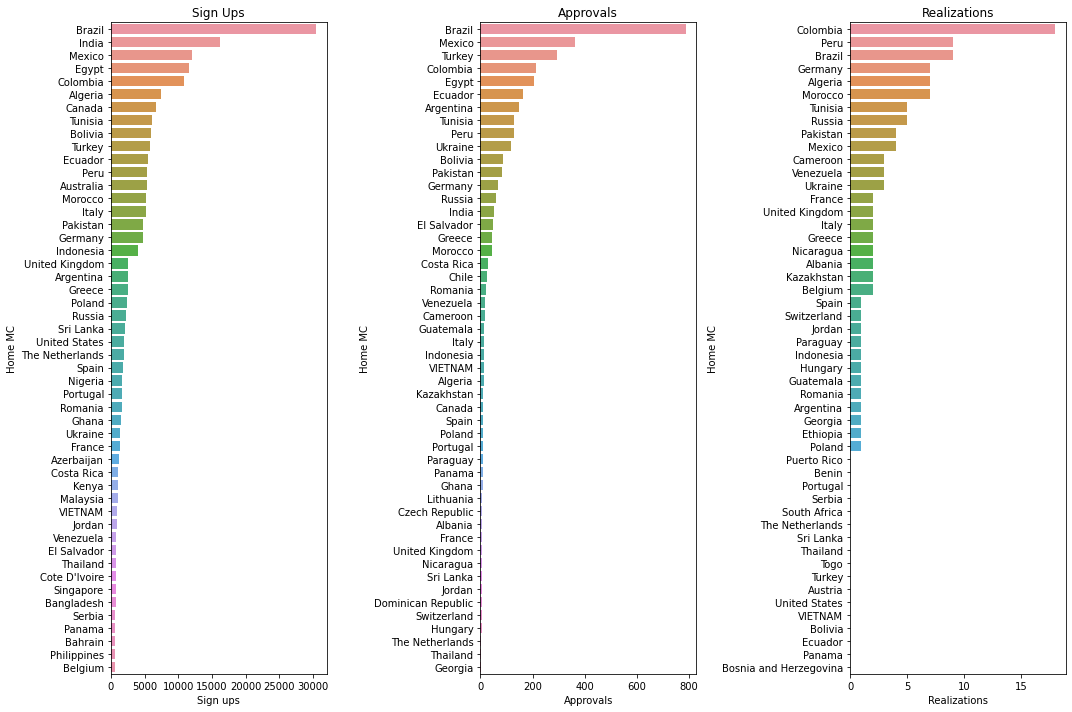

In [863]:
# Plotting TOP 50 countries on sign ups
fig, axes = plt.subplots(1,3,figsize=(15,10))

ax1 = sns.barplot(y=top_signups.index[:50],x=top_signups.iloc[:50]['Sign ups'],ax=axes[0]).set(title='Sign Ups')
ax2 = sns.barplot(y=top_daal_apd.index[:50],x=top_daal_apd.iloc[:50]['Approvals'],ax=axes[1]).set(title='Approvals')
ax3 = sns.barplot(y=top_daal_re.index[:50],x=top_daal_re.iloc[:50]['Realizations'],ax=axes[2]).set(title='Realizations')

plt.tight_layout()

In [864]:
signups_per_day = signups.set_index('Sign up date')
signups_per_day = signups.groupby(['Sign up date']).count()
signups_per_day = signups_per_day.rename(columns={'Home MC':'Sign ups'})
signups_per_day.drop(['Gender'],inplace=True, axis=1)

signups_per_day['Age'] = signups.groupby(['Sign up date'])['Age'].mean().round(2)
signups_per_day['GV'] = signups.groupby(['Sign up date'])['Interest in GV'].sum()
signups_per_day['GTa'] = signups.groupby(['Sign up date'])['Interest in GTa'].sum()
signups_per_day['GTe'] = signups.groupby(['Sign up date'])['Interest in GTe'].sum()
signups_per_day['GT'] = signups.groupby(['Sign up date'])['Interest in GT'].sum()
signups_per_day['GE'] = signups.groupby(['Sign up date'])['Interest in GE'].sum()
signups_per_day['No interest'] = signups_per_day['Sign ups'] - (signups_per_day['GV'] + signups_per_day['GTa'] + signups_per_day['GTe'] + signups_per_day['GT'] + signups_per_day['GE'])
signups_per_day.drop(['Interest in GV','Interest in GTa','Interest in GTe','Interest in GT','Interest in GE'],inplace= True, axis=1)

signups_per_day

,Sign ups,Age,GV,GTa,GTe,GT,GE,No interest
Sign up date,,,,,,,,
2020-01-22,1516,22.87,738,374,0,0,211,193
2020-01-23,1358,22.87,544,374,1,1,186,252
2020-01-24,979,23.06,399,290,0,0,149,141
2020-01-25,804,23.51,353,213,0,0,107,131
2020-01-26,732,22.77,304,215,0,0,96,117
...,...,...,...,...,...,...,...,...
2020-09-24,883,29.96,255,173,22,0,0,433
2020-09-25,824,38.25,278,138,18,0,0,390
2020-09-26,644,47.42,183,118,24,0,0,319


In [865]:
approvals_per_day = daal_apd.set_index('Date approved').sort_index()
approvals_per_day = daal_apd.groupby(['Date approved']).count()
approvals_per_day = approvals_per_day.rename(columns={'Home MC':'Approvals'})

approvals_per_day

,Approvals
Date approved,
2020-01-22,47
2020-01-23,41
2020-01-24,40
2020-01-25,24
2020-01-26,19
...,...
2020-09-24,67
2020-09-25,89
2020-09-26,43


In [866]:
realizations_per_day = daal_re.set_index('Date realized').sort_index()
realizations_per_day = daal_re.groupby(['Date realized']).count()
realizations_per_day = realizations_per_day.rename(columns={'Home MC':'Realizations'})

realizations_per_day

,Realizations
Date realized,
2020-01-22,157
2020-01-23,142
2020-01-24,101
2020-01-25,44
2020-01-26,46
...,...
2020-09-23,8
2020-09-24,2
2020-09-25,5


In [867]:
df_daily_results = signups_per_day.merge(approvals_per_day, how='left', left_index=True, right_index=True).merge(realizations_per_day, how='left', left_index=True, right_index=True)
df_daily_results.fillna(0,inplace=True)
df_daily_results

,Sign ups,Age,GV,GTa,GTe,GT,GE,No interest,Approvals,Realizations
Sign up date,,,,,,,,,,
2020-01-22,1516,22.87,738,374,0,0,211,193,47,157.0
2020-01-23,1358,22.87,544,374,1,1,186,252,41,142.0
2020-01-24,979,23.06,399,290,0,0,149,141,40,101.0
2020-01-25,804,23.51,353,213,0,0,107,131,24,44.0
2020-01-26,732,22.77,304,215,0,0,96,117,19,46.0
...,...,...,...,...,...,...,...,...,...,...
2020-09-24,883,29.96,255,173,22,0,0,433,67,2.0
2020-09-25,824,38.25,278,138,18,0,0,390,89,5.0
2020-09-26,644,47.42,183,118,24,0,0,319,43,2.0


Text(0, 0.5, '# Signups / Approvals / Realizations')

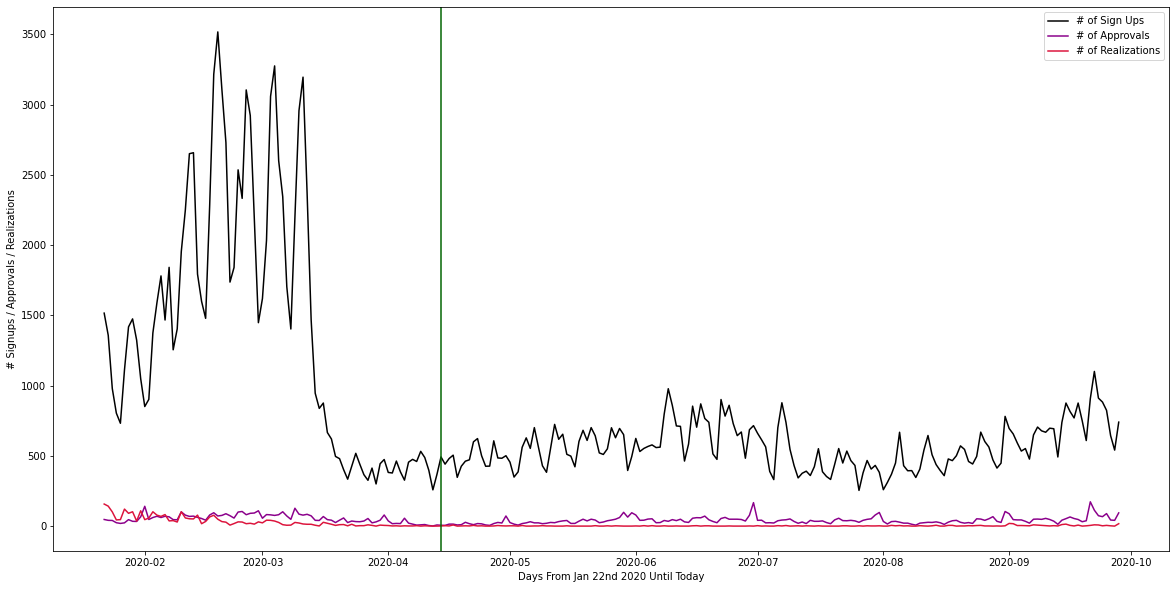

In [868]:
# Plotting total number of sign ups per day
fix, ax = plt.subplots(figsize=(20,10))

x=signups_per_day.index[:]

y1 = df_daily_results.iloc[:]['Sign ups']
y2 = df_daily_results.iloc[:]['Approvals']
y3 = df_daily_results.iloc[:]['Realizations']

sns.lineplot(x=x, y=y1,label='# of Sign Ups',color='black')
sns.lineplot(x=x, y=y2,label='# of Approvals',color='darkmagenta')
sns.lineplot(x=x, y=y3,label='# of Realizations',color='crimson')
plt.axvline(pd.Timestamp('2020-04-14'),color='darkgreen')

ax.set_xlabel('Days From Jan 22nd 2020 Until Today')
ax.set_ylabel('# Signups / Approvals / Realizations')

Text(0, 0.5, '# Approvals / Realizations')

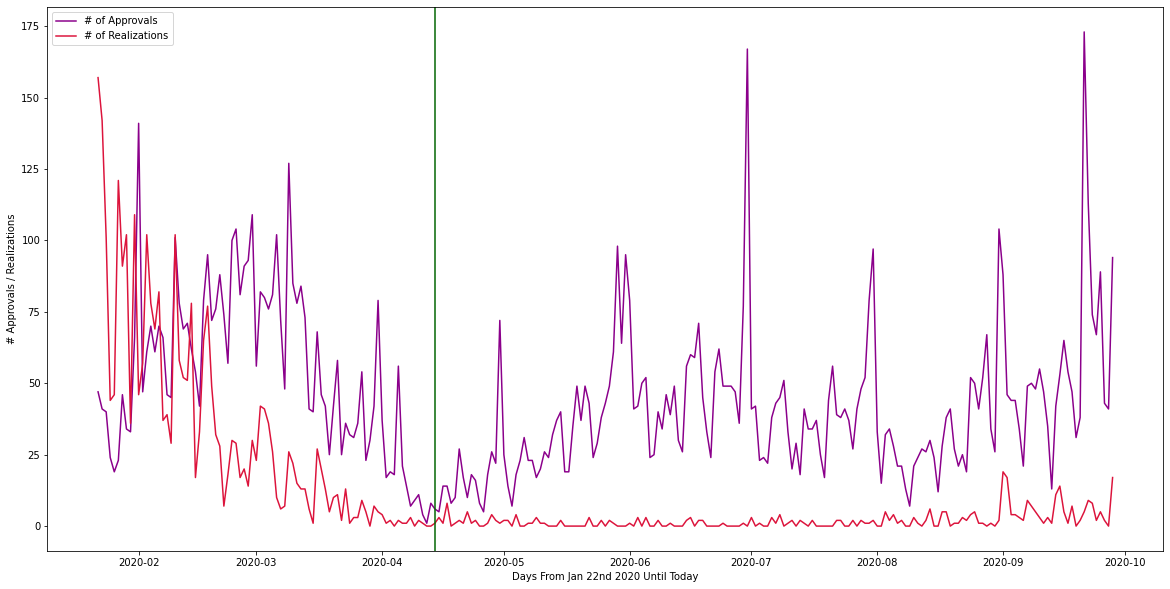

In [869]:
# Plotting total number of sign ups per day
fix, ax = plt.subplots(figsize=(20,10))

x=signups_per_day.index[:]

y2 = df_daily_results.iloc[:]['Approvals']
y3 = df_daily_results.iloc[:]['Realizations']

sns.lineplot(x=x, y=y2,label='# of Approvals',color='darkmagenta')
sns.lineplot(x=x, y=y3,label='# of Realizations',color='crimson')
plt.axvline(pd.Timestamp('2020-04-14'),color='darkgreen')

ax.set_xlabel('Days From Jan 22nd 2020 Until Today')
ax.set_ylabel('# Approvals / Realizations')

# Sign Up Analysis related to confirmed cases, deaths and recoveries
The objective of this section is to analyse how our sign ups and our global communication plan got affected by COVID-19 confirmed cases, deaths and recoveries.

**What was communicated to our National Offices?**
- April 14th, 2020: Halt (stop) all attraction activities (physical and virtual) until the 1st of June for Youth (OGX)

**Main assumptions tested:**
- We should have had less sign ups between April 14th and June 1st

In [870]:
# Turning my arrays into dataframes - Confirmed cases data
global_daily_cases = pd.DataFrame(global_daily_cases)
global_daily_cases.set_index(signups_per_day.index[:],inplace=True)

# Turning my arrays into dataframes - Deaths data
global_daily_deaths = pd.DataFrame(global_daily_deaths)
global_daily_deaths.set_index(signups_per_day.index[:],inplace=True)

# Turning my arrays into dataframes - Recovered cases data
global_daily_recoveries = pd.DataFrame(global_daily_recoveries)
global_daily_recoveries.set_index(signups_per_day.index[:],inplace=True)

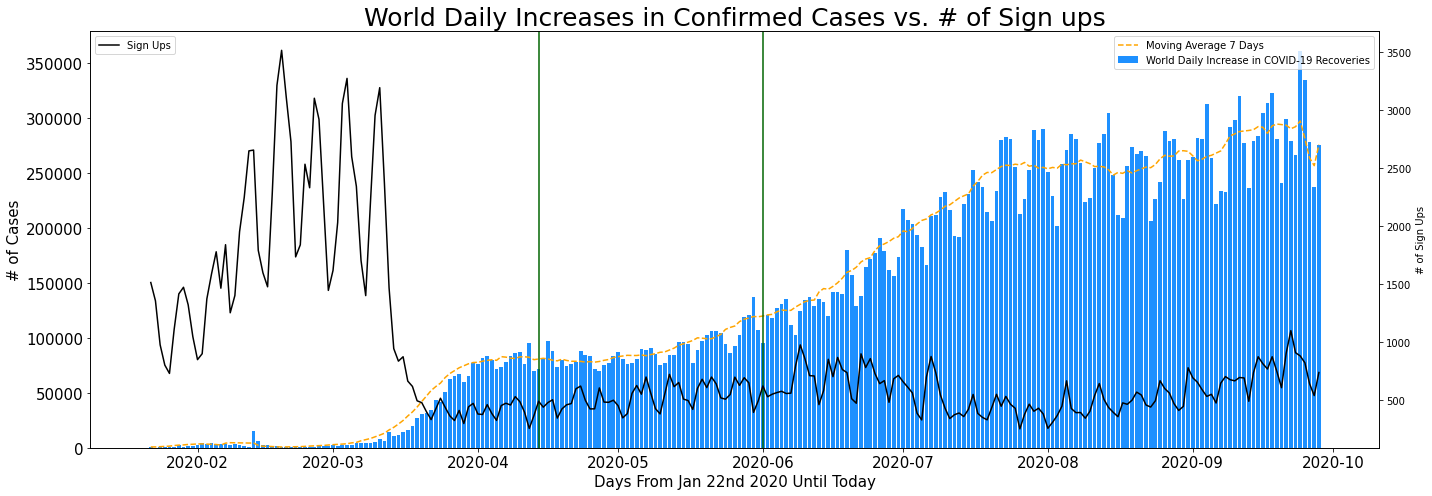

In [871]:
# Plotting number of daily confirmed cases per day of COVID-19 vs. # of Sign ups
fig, ax = plt.subplots(figsize=(20, 7))

#sns.barplot(x = global_daily_cases.index[:],y = global_daily_cases.iloc[:][0], label='World Daily Increase in COVID-19 Recoveries')
plt.bar(global_daily_cases.index[:], global_daily_cases.iloc[:][0], color='dodgerblue', label='World Daily Increase in COVID-19 Recoveries')
plt.plot(global_daily_cases.index[:], global_daily_avg_increase, linestyle='dashed', color='orange', label='Moving Average 7 Days')
plt.title('World Daily Increases in Confirmed Cases vs. # of Sign ups', size=25)
plt.xlabel('Days From Jan 22nd 2020 Until Today', size=15)
plt.ylabel('# of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)

# Event line: April 14/ June 1st - Assumption: We should have had less sign ups between April 14th and June 1st
plt.axvline(pd.Timestamp('2020-04-14'),color='darkgreen')
plt.axvline(pd.Timestamp('2020-06-01'),color='darkgreen')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('# of Sign Ups', color=color)  # we already handled the x-label with ax1
ax2.plot(global_daily_cases.index[:], df_daily_results.iloc[:]['Sign ups'], color='black', label = 'Sign Ups')
ax2.tick_params(axis='y', labelcolor=color)

leg = ax.legend();
ax.legend(loc='upper right', frameon=True)
plt.legend(loc='upper left', frameon=True)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

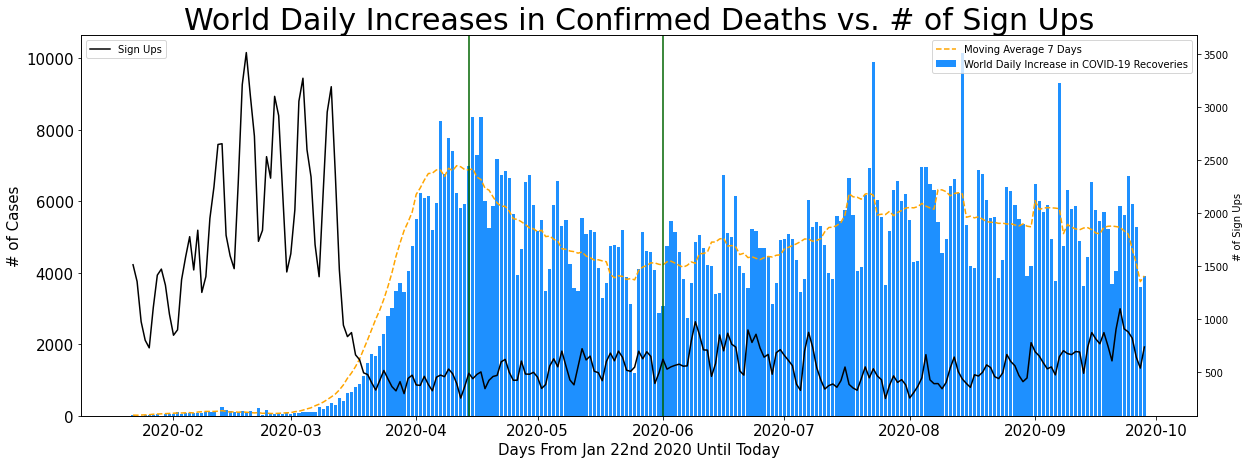

In [872]:
# Plotting number of daily confirmed deaths per day of COVID-19 vs. # of Realizations
fig1, ax = plt.subplots(figsize=(20, 7))

#sns.barplot(x = list(range(len(global_daily_deaths))),y = global_daily_deaths, label='World Daily Increase in COVID-19 Recoveries')
plt.bar(global_daily_deaths.index[:], global_daily_deaths.iloc[:][0], color='dodgerblue', label='World Daily Increase in COVID-19 Recoveries')
plt.plot(global_daily_deaths.index[:], global_daily_avg_increase_deaths, linestyle='dashed', color='orange', label='Moving Average 7 Days')
plt.title('World Daily Increases in Confirmed Deaths vs. # of Sign Ups', size=30)
plt.xlabel('Days From Jan 22nd 2020 Until Today', size=15)
plt.ylabel('# of Cases', size=15)
#plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Recoveries'], prop={'size': 20})
plt.xticks(size=15)
plt.yticks(size=15)

# Event line: April 14/ June 1st - Assumption: We should have had less sign ups between April 14th and June 1st
plt.axvline(pd.Timestamp('2020-04-14'),color='darkgreen')
plt.axvline(pd.Timestamp('2020-06-01'),color='darkgreen')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('# of Sign Ups', color=color)  # we already handled the x-label with ax1
ax2.plot(global_daily_deaths.index[:], df_daily_results.iloc[:]['Sign ups'], color='black', label = 'Sign Ups')
ax2.tick_params(axis='y', labelcolor=color)

leg = ax.legend();
ax.legend(loc='upper right', frameon=True)
plt.legend(loc='upper left', frameon=True)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

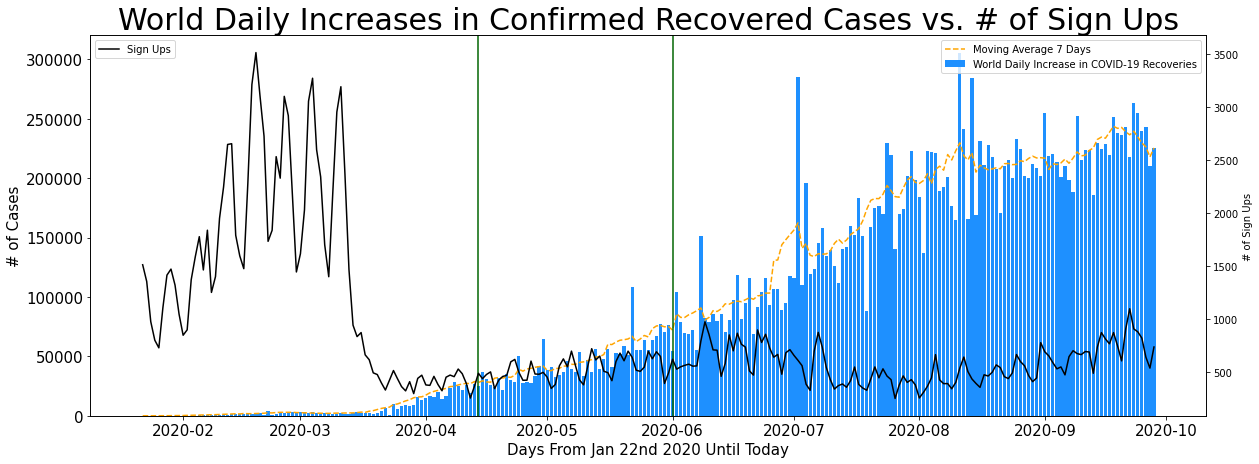

In [873]:
# Plotting number of daily confirmed recoveries per day of COVID-19 vs. # of Sign Ups
fig1, ax = plt.subplots(figsize=(20, 7))

#sns.barplot(x = list(range(len(global_daily_recoveries))),y = global_daily_recoveries, label='World Daily Increase in COVID-19 Recoveries')
plt.bar(global_daily_recoveries.index[:], global_daily_recoveries.iloc[:][0], color='dodgerblue', label='World Daily Increase in COVID-19 Recoveries')
plt.plot(global_daily_recoveries.index[:], global_daily_avg_increase_recoveries, linestyle='dashed', color='orange', label='Moving Average 7 Days')
plt.title('World Daily Increases in Confirmed Recovered Cases vs. # of Sign Ups', size=30)
plt.xlabel('Days From Jan 22nd 2020 Until Today', size=15)
plt.ylabel('# of Cases', size=15)
#plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Recoveries'], prop={'size': 20})
plt.xticks(size=15)
plt.yticks(size=15)

# Event line: April 14/ June 1st - Assumption: We should have had less sign ups between April 14th and June 1st
plt.axvline(pd.Timestamp('2020-04-14'),color='darkgreen')
plt.axvline(pd.Timestamp('2020-06-01'),color='darkgreen')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('# of Sign Ups', color=color)  # we already handled the x-label with ax1
ax2.plot(global_daily_recoveries.index[:], df_daily_results.iloc[:]['Sign ups'], color='black', label = 'Sign Ups')
ax2.tick_params(axis='y', labelcolor=color)

leg = ax.legend();
ax.legend(loc='upper right', frameon=True)
plt.legend(loc='upper left', frameon=True)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

# Approval Analysis related to confirmed cases, deaths and recoveries
The objective of this section is to analyse how our approvals (actual result from sales process) and our global communication plan got affected by COVID-19 confirmed cases, deaths and recoveries.

**What was communicated to our National Offices?**
- April 14th, 2020: Halt (stop) all attraction activities (physical and virtual) until the 1st of June for Youth (OGX)
- July 3rd, 2020: Network to decide on when to resume operations based individual entity external context

**Main assumptions tested:**
- The peak should have resumed because we told the network to resume operations at will
- We should have had less sign ups between April 14th and June 1st

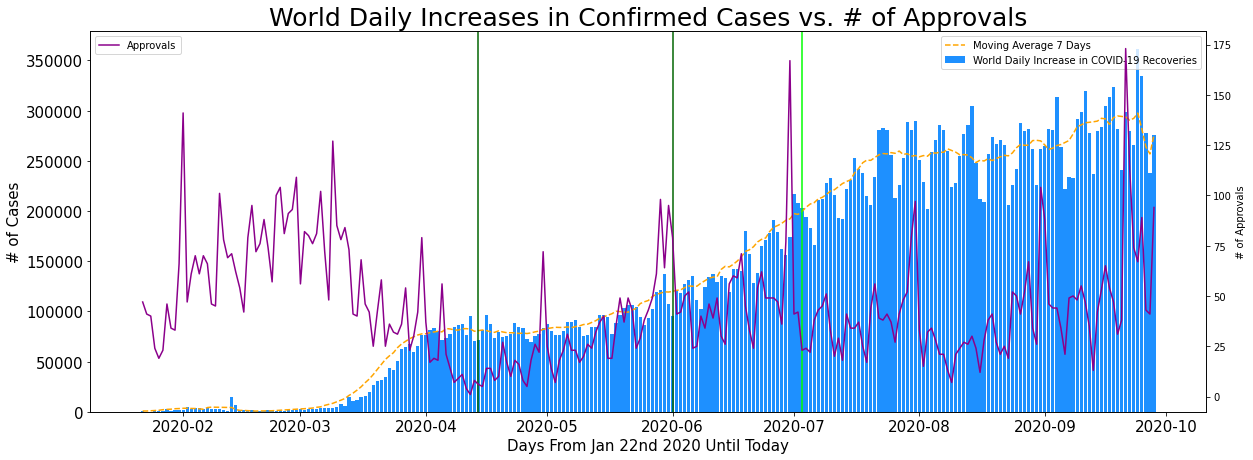

In [918]:
# Plotting number of daily confirmed cases per day of COVID-19 vs. # of Approvals
fig1, ax = plt.subplots(figsize=(20, 7))

#plt.bar(list(range(len(global_daily_cases))), global_daily_cases, label='Moving Average 7 Days')
#sns.barplot(x = list(range(len(global_daily_cases))),y = global_daily_cases, label='World Daily Increase in COVID-19 Recoveries')
plt.bar(global_daily_cases.index[:], global_daily_cases.iloc[:][0], color='dodgerblue', label='World Daily Increase in COVID-19 Recoveries')
plt.plot(global_daily_cases.index[:], global_daily_avg_increase, linestyle='dashed', color='orange', label='Moving Average 7 Days')
plt.title('World Daily Increases in Confirmed Cases vs. # of Approvals', size=25)
plt.xlabel('Days From Jan 22nd 2020 Until Today', size=15)
plt.ylabel('# of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)

# Event line: April 14/ June 1st - Assumption: We should have had less sign ups between April 14th and June 1st
plt.axvline(pd.Timestamp('2020-04-14'),color='darkgreen')
plt.axvline(pd.Timestamp('2020-06-01'),color='darkgreen')

# Event line: July 3rd - Assumption: The peak should have resumed because we told the network to resume operations at will
plt.axvline(pd.Timestamp('2020-07-03'),color='lime')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('# of Approvals', color=color)  # we already handled the x-label with ax1
ax2.plot(global_daily_cases.index[:], df_daily_results.iloc[:]['Approvals'], color='darkmagenta', label = 'Approvals')
ax2.tick_params(axis='y', labelcolor=color)

leg = ax.legend();
ax.legend(loc='upper right', frameon=True)
plt.legend(loc='upper left', frameon=True)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

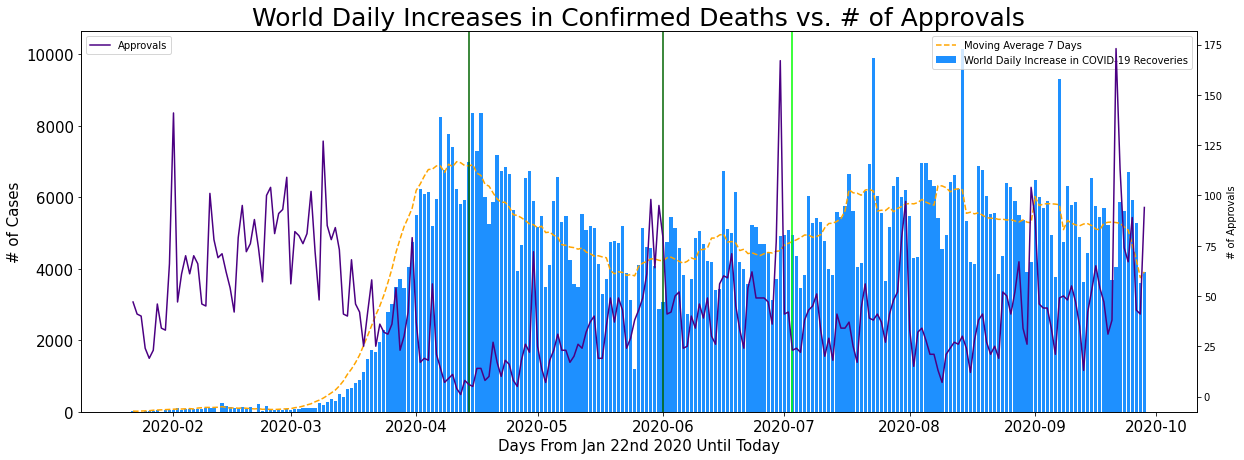

In [919]:
# Plotting number of daily confirmed deaths per day of COVID-19 vs. # of Approvals
fig1, ax = plt.subplots(figsize=(20, 7))

#sns.barplot(x = list(range(len(global_daily_deaths))),y = global_daily_deaths, label='World Daily Increase in COVID-19 Recoveries')
plt.bar(global_daily_deaths.index[:], global_daily_deaths.iloc[:][0], color='dodgerblue', label='World Daily Increase in COVID-19 Recoveries')
plt.plot(global_daily_deaths.index[:], global_daily_avg_increase_deaths, linestyle='dashed', color='orange', label='Moving Average 7 Days')
plt.title('World Daily Increases in Confirmed Deaths vs. # of Approvals', size=25)
plt.xlabel('Days From Jan 22nd 2020 Until Today', size=15)
plt.ylabel('# of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)

# Event line: April 14/ June 1st - Assumption: We should have had less sign ups between April 14th and June 1st
plt.axvline(pd.Timestamp('2020-04-14'),color='darkgreen')
plt.axvline(pd.Timestamp('2020-06-01'),color='darkgreen')

# Event line: July 3rd - Assumption: The peak should have resumed because we told the network to resume operations at will
plt.axvline(pd.Timestamp('2020-07-03'),color='lime')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('# of Approvals', color=color)  # we already handled the x-label with ax1
ax2.plot(global_daily_deaths.index[:], df_daily_results.iloc[:]['Approvals'], color='indigo', label = 'Approvals')
ax2.tick_params(axis='y', labelcolor=color)

leg = ax.legend();
ax.legend(loc='upper right', frameon=True)
plt.legend(loc='upper left', frameon=True)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

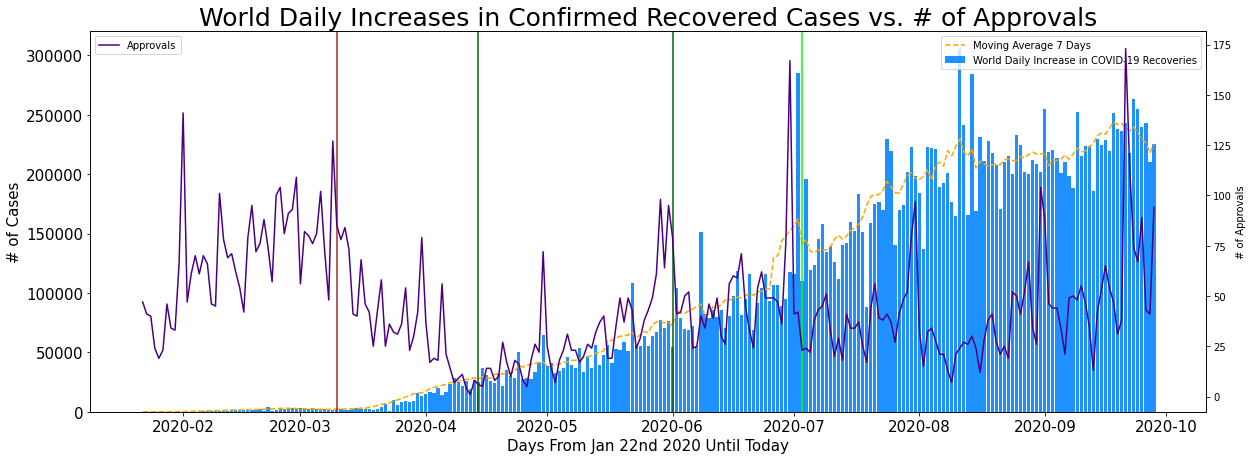

In [924]:
# Plotting number of daily confirmed recovered cases per day of COVID-19 vs. # of Approvals
fig1, ax = plt.subplots(figsize=(20, 7))

#sns.barplot(x = list(range(len(global_daily_recoveries))),y = global_daily_recoveries, label='World Daily Increase in COVID-19 Recoveries')
plt.bar(global_daily_recoveries.index[:], global_daily_recoveries.iloc[:][0], color='dodgerblue', label='World Daily Increase in COVID-19 Recoveries')
plt.plot(global_daily_recoveries.index[:], global_daily_avg_increase_recoveries, linestyle='dashed', color='orange', label='Moving Average 7 Days')
plt.title('World Daily Increases in Confirmed Recovered Cases vs. # of Approvals', size=25)
plt.xlabel('Days From Jan 22nd 2020 Until Today', size=15)
plt.ylabel('# of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)

# Event line: April 14/ June 1st - Assumption: We should have had less sign ups between April 14th and June 1st
plt.axvline(pd.Timestamp('2020-04-14'),color='darkgreen')
plt.axvline(pd.Timestamp('2020-06-01'),color='darkgreen')

# Event line: July 3rd - Assumption: The peak should have resumed because we told the network to resume operations at will
plt.axvline(pd.Timestamp('2020-07-03'),color='lime')

# Event line: AI started to guide entities on a non-official manner
plt.axvline(pd.Timestamp('2020-03-10'),color='brown')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('# of Approvals', color=color)  # we already handled the x-label with ax1
ax2.plot(global_daily_recoveries.index[:], df_daily_results.iloc[:]['Approvals'], color='indigo', label = 'Approvals')
ax2.tick_params(axis='y', labelcolor=color)

leg = ax.legend();
ax.legend(loc='upper right', frameon=True)
plt.legend(loc='upper left', frameon=True)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

# Realizations Analysis related to confirmed cases, deaths and recoveries
The objective of this section is to analyse how our realizations (when our customer experiences our products) and our global communication plan got affected by COVID-19 confirmed cases, deaths and recoveries.

**What was communicated to our National Offices?**
- April 14th, 2020: Move all projected RE to after September 1st 
- April 14th, 2020: Do not process any EPs to Realize before September 1st
- April 14th, 2020: Follow government communication and regulations for already Realized EPs 

**Main assumptions tested:**
- Break approvals/Break Realizations should had started to happen on April 14th
- Realizations should have started back on September 1st
- We should not have any realization between April 14th and June 1st

**Assumtion tested below:**
- Lime vertical line: Realizations should have started back on September 1st
- Dark green vertical lines: We should not have any realization between April 14th and June 1st

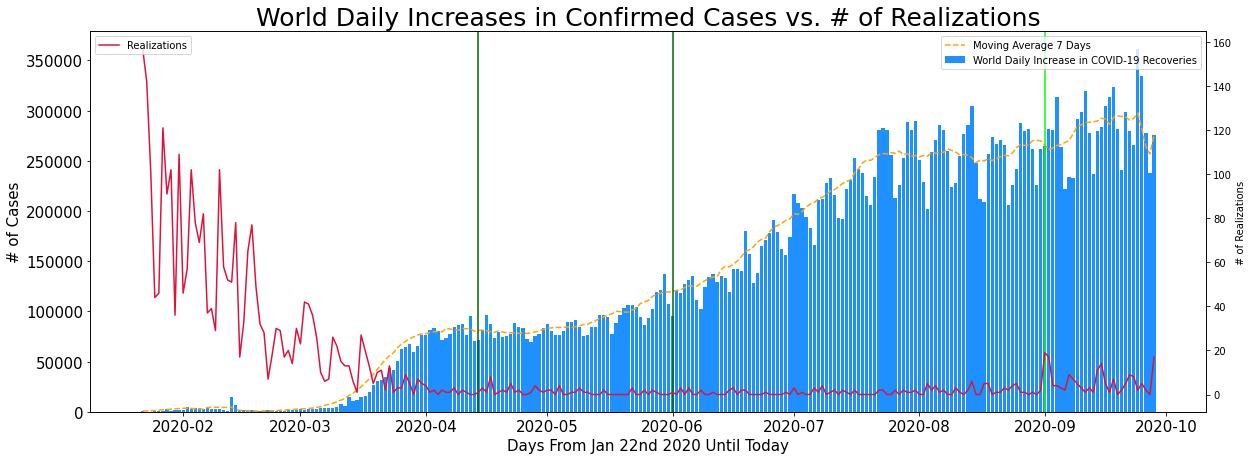

In [877]:
# Plotting number of daily confirmed cases per day of COVID-19 vs. # of Realizations
fig1, ax = plt.subplots(figsize=(20, 7))

#plt.bar(list(range(len(global_daily_cases))), global_daily_cases, label='Moving Average 7 Days')
#sns.barplot(x = list(range(len(global_daily_cases))),y = global_daily_cases, label='World Daily Increase in COVID-19 Recoveries')
plt.bar(global_daily_cases.index[:], global_daily_cases.iloc[:][0], color='dodgerblue', label='World Daily Increase in COVID-19 Recoveries')
plt.plot(global_daily_cases.index[:], global_daily_avg_increase, linestyle='dashed', color='orange', label='Moving Average 7 Days')
plt.title('World Daily Increases in Confirmed Cases vs. # of Realizations', size=25)
plt.xlabel('Days From Jan 22nd 2020 Until Today', size=15)
plt.ylabel('# of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)

# Event line: April 14/ June 1st - Assumption: We should not have had any realization between April 14th and June 1st
plt.axvline(pd.Timestamp('2020-04-14'),color='darkgreen')
plt.axvline(pd.Timestamp('2020-06-01'),color='darkgreen')

# Event line: Sept 1st - Assumption: Realizations should have started back on September 1st
plt.axvline(pd.Timestamp('2020-09-01'),color='lime')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('# of Realizations', color=color)  # we already handled the x-label with ax1
ax2.plot(global_daily_cases.index[:], df_daily_results.iloc[:]['Realizations'], color='crimson', label = 'Realizations')
ax2.tick_params(axis='y', labelcolor=color)

leg = ax.legend();
ax.legend(loc='upper right', frameon=True)
plt.legend(loc='upper left', frameon=True)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

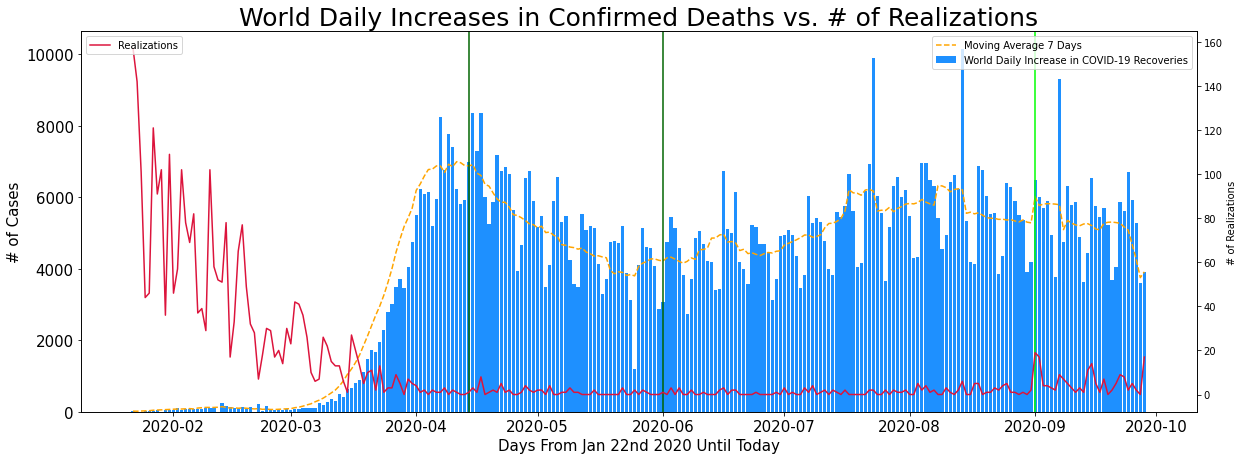

In [878]:
# Plotting number of daily confirmed death cases per day of COVID-19 vs. # of Realizations
fig1, ax = plt.subplots(figsize=(20, 7))

#plt.bar(list(range(len(global_daily_cases))), global_daily_cases, label='Moving Average 7 Days')
#sns.barplot(x = list(range(len(global_daily_deaths))),y = global_daily_deaths, label='World Daily Increase in COVID-19 Recoveries')
plt.bar(global_daily_deaths.index[:], global_daily_deaths.iloc[:][0], color='dodgerblue', label='World Daily Increase in COVID-19 Recoveries')
plt.plot(global_daily_deaths.index[:], global_daily_avg_increase_deaths, linestyle='dashed', color='orange', label='Moving Average 7 Days')
plt.title('World Daily Increases in Confirmed Deaths vs. # of Realizations', size=25)
plt.xlabel('Days From Jan 22nd 2020 Until Today', size=15)
plt.ylabel('# of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)

# Event line: April 14/ June 1st - Assumption: We should not have had any realization between April 14th and June 1st
plt.axvline(pd.Timestamp('2020-04-14'),color='darkgreen')
plt.axvline(pd.Timestamp('2020-06-01'),color='darkgreen')

# Event line: Sept 1st - Assumption: Realizations should have started back on September 1st
plt.axvline(pd.Timestamp('2020-09-01'),color='lime')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('# of Realizations', color=color)  # we already handled the x-label with ax1
ax2.plot(global_daily_deaths.index[:], df_daily_results.iloc[:]['Realizations'], color='crimson', label = 'Realizations')
ax2.tick_params(axis='y', labelcolor=color)

leg = ax.legend();
ax.legend(loc='upper right', frameon=True)
plt.legend(loc='upper left', frameon=True)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

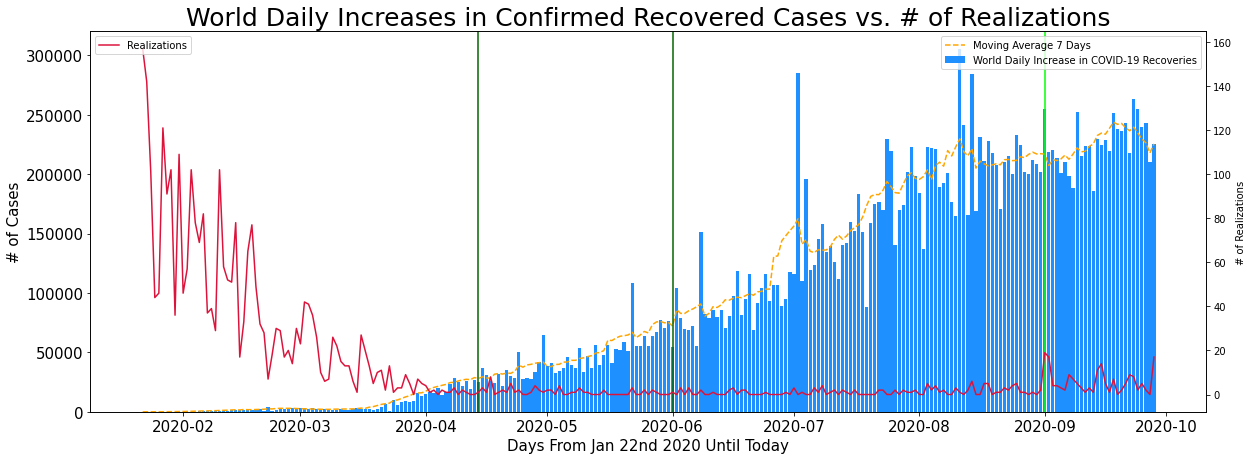

In [879]:
# Plotting number of daily confirmed recovered cases per day of COVID-19 vs. # of Realizations
fig1, ax = plt.subplots(figsize=(20, 7))

#plt.bar(list(range(len(global_daily_cases))), global_daily_cases, label='Moving Average 7 Days')
#sns.barplot(x = list(range(len(global_daily_recoveries))),y = global_daily_recoveries, label='World Daily Increase in COVID-19 Recoveries')
plt.bar(global_daily_recoveries.index[:], global_daily_recoveries.iloc[:][0], color='dodgerblue', label='World Daily Increase in COVID-19 Recoveries')
plt.plot(global_daily_recoveries.index[:], global_daily_avg_increase_recoveries, linestyle='dashed', color='orange', label='Moving Average 7 Days')
plt.title('World Daily Increases in Confirmed Recovered Cases vs. # of Realizations', size=25)
plt.xlabel('Days From Jan 22nd 2020 Until Today', size=15)
plt.ylabel('# of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)

# Event line: April 14/ June 1st - Assumption: We should not have had any realization between April 14th and June 1st
plt.axvline(pd.Timestamp('2020-04-14'),color='darkgreen')
plt.axvline(pd.Timestamp('2020-06-01'),color='darkgreen')

# Event line: Sept 1st - Assumption: Realizations should have started back on September 1st
plt.axvline(pd.Timestamp('2020-09-01'),color='lime')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('# of Realizations', color=color)  # we already handled the x-label with ax1
ax2.plot(global_daily_recoveries.index[:], df_daily_results.iloc[:]['Realizations'], color='crimson', label = 'Realizations')
ax2.tick_params(axis='y', labelcolor=color)

leg = ax.legend();
ax.legend(loc='upper right', frameon=True)
plt.legend(loc='upper left', frameon=True)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

**Assumtion tested below:**
- Break approvals should start to happen on April 14th

In [890]:
# Loading Broken Approvals Data
daal_break_apd = pd.read_csv('/Users/thaleslopes/Documents/workspace/AI/Jupyter Notebooks/covid19-impact-analysis/covid_analysis_approval_broken.csv').drop(['EP ID','Home LC','Home Region','Host LC', 'Host MC','Host Region'],axis=1)
daal_break_apd['Date Break APD']= pd.to_datetime(daal_break_apd['Date Break APD']).dt.date

# Loading Broken Realizations Data
daal_break_re = pd.read_csv('/Users/thaleslopes/Documents/workspace/AI/Jupyter Notebooks/covid19-impact-analysis/covid_analysis_re_broken.csv').drop(['EP ID','Home LC','Home Region','Host LC', 'Host MC','Host Region'],axis=1)
daal_break_re['Date Break RE']= pd.to_datetime(daal_break_re['Date Break RE']).dt.date

In [891]:
daal_break_apd

,Home MC,Date Break APD
0,Argentina,2020-04-17
1,Argentina,2020-04-15
2,The Netherlands,2020-06-19
3,Lithuania,2020-06-23
4,Panama,2020-07-16
...,...,...
10474,Tunisia,2020-08-28
10475,Ukraine,2020-09-16
10476,Turkey,2020-09-07
10477,Brazil,2020-09-23


In [892]:
daal_break_re

,Home MC,Date Break RE
0,United States,2020-04-05
1,Colombia,2020-06-05
2,Peru,2020-05-24
3,Peru,2020-04-01
4,Brazil,2020-06-25
...,...,...
902,Czech Republic,2020-04-22
903,Colombia,2020-03-30
904,Turkey,2020-03-30
905,Romania,2020-08-14


In [893]:
break_apd_per_day = daal_break_apd.set_index('Date Break APD').sort_index()
break_apd_per_day = daal_break_apd.groupby(['Date Break APD']).count()
break_apd_per_day = break_apd_per_day.rename(columns={'Home MC':'Broken Approvals'})

break_re_per_day = daal_break_re.set_index('Date Break RE').sort_index()
break_re_per_day = daal_break_re.groupby(['Date Break RE']).count()
break_re_per_day = break_re_per_day.rename(columns={'Home MC':'Broken Realizations'})

In [911]:
df_daily_break_results = signups_per_day.merge(break_apd_per_day.merge(break_re_per_day, how='left', left_index=True, right_index=True),how='left', left_index=True, right_index=True)
df_daily_break_results.fillna(0,inplace=True)
df_daily_break_results.drop(['Age','Sign ups','GV','GTa','GTe','GE','GT','No interest'],axis=1,inplace=True)
df_daily_break_results

,Broken Approvals,Broken Realizations
Sign up date,,
2020-01-22,12.0,4.0
2020-01-23,11.0,0.0
2020-01-24,6.0,7.0
2020-01-25,0.0,0.0
2020-01-26,13.0,5.0
...,...,...
2020-09-24,15.0,1.0
2020-09-25,72.0,0.0
2020-09-26,15.0,0.0


Text(0, 0.5, '# Broken Approvals / Broken Realizations')

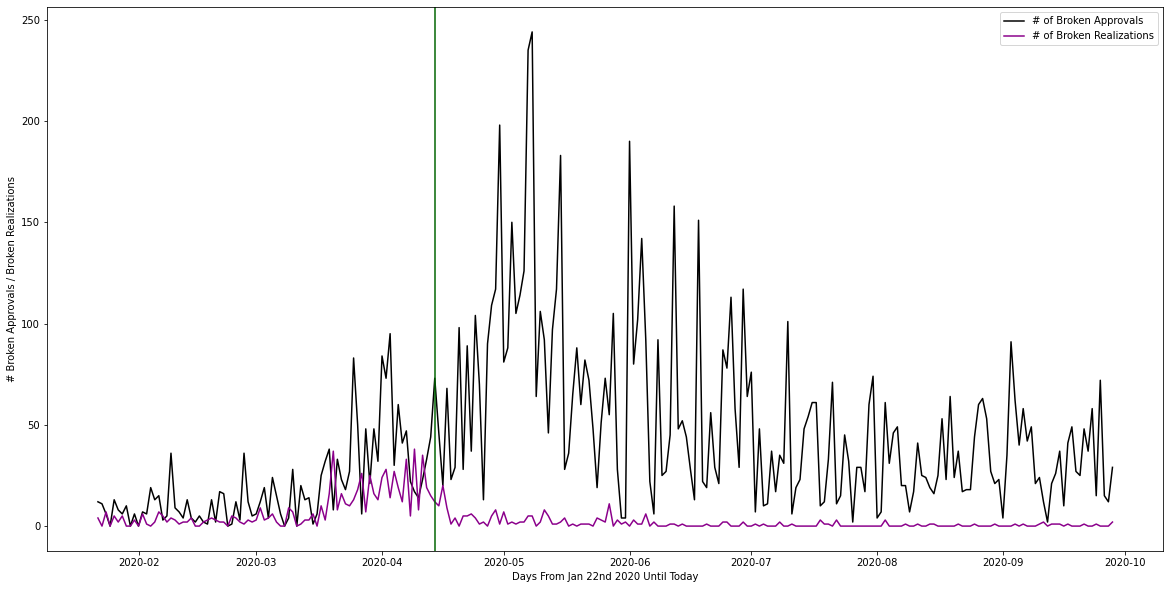

In [906]:
# Plotting total number of broken approvals / broken realizations per day
fix, ax = plt.subplots(figsize=(20,10))

x=df_daily_break_results.index[:]

y1 = df_daily_break_results.iloc[:]['Broken Approvals']
y2 = df_daily_break_results.iloc[:]['Broken Realizations']

sns.lineplot(x=x, y=y1,label='# of Broken Approvals',color='black')
sns.lineplot(x=x, y=y2,label='# of Broken Realizations',color='darkmagenta')
plt.axvline(pd.Timestamp('2020-04-14'),color='darkgreen')

ax.set_xlabel('Days From Jan 22nd 2020 Until Today')
ax.set_ylabel('# Broken Approvals / Broken Realizations')

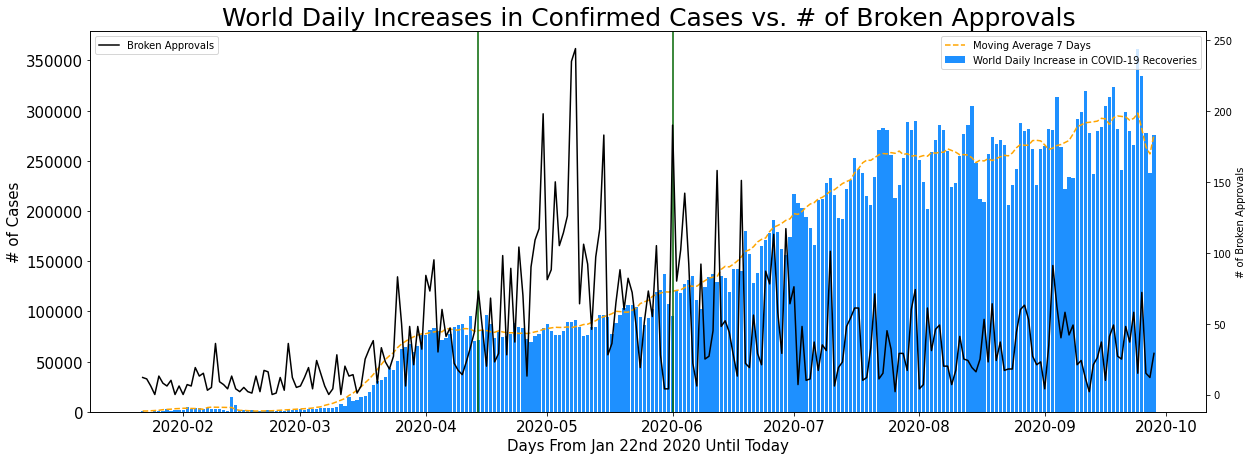

In [916]:
# Plotting number of daily confirmed cases per day of COVID-19 vs. # of Realizations
fig1, ax = plt.subplots(figsize=(20, 7))

#plt.bar(list(range(len(global_daily_cases))), global_daily_cases, label='Moving Average 7 Days')
#sns.barplot(x = list(range(len(global_daily_cases))),y = global_daily_cases, label='World Daily Increase in COVID-19 Recoveries')
plt.bar(global_daily_cases.index[:], global_daily_cases.iloc[:][0], color='dodgerblue', label='World Daily Increase in COVID-19 Recoveries')
plt.plot(global_daily_cases.index[:], global_daily_avg_increase, linestyle='dashed', color='orange', label='Moving Average 7 Days')
plt.title('World Daily Increases in Confirmed Cases vs. # of Broken Approvals', size=25)
plt.xlabel('Days From Jan 22nd 2020 Until Today', size=15)
plt.ylabel('# of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)

# Event line: April 14/ June 1st - Assumption: We should not have had any realization between April 14th and June 1st
plt.axvline(pd.Timestamp('2020-04-14'),color='darkgreen')
plt.axvline(pd.Timestamp('2020-06-01'),color='darkgreen')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('# of Broken Approvals', color=color)  # we already handled the x-label with ax1
ax2.plot(global_daily_cases.index[:], df_daily_break_results.iloc[:]['Broken Approvals'], color='black', label = 'Broken Approvals')
ax2.tick_params(axis='y', labelcolor=color)

leg = ax.legend();
ax.legend(loc='upper right', frameon=True)
plt.legend(loc='upper left', frameon=True)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

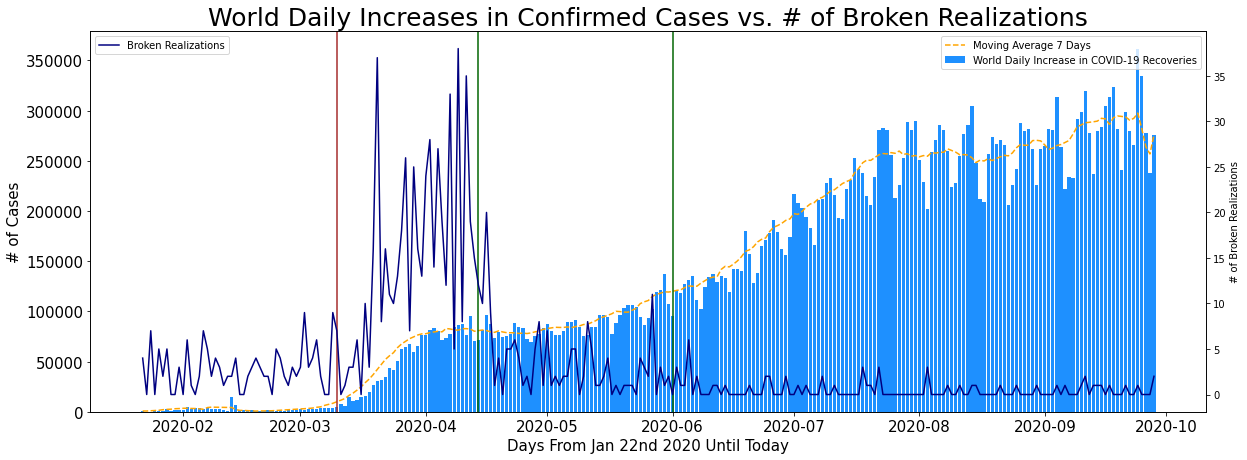

In [923]:
# Plotting number of daily confirmed cases per day of COVID-19 vs. # of Realizations
fig1, ax = plt.subplots(figsize=(20, 7))

#plt.bar(list(range(len(global_daily_cases))), global_daily_cases, label='Moving Average 7 Days')
#sns.barplot(x = list(range(len(global_daily_cases))),y = global_daily_cases, label='World Daily Increase in COVID-19 Recoveries')
plt.bar(global_daily_cases.index[:], global_daily_cases.iloc[:][0], color='dodgerblue', label='World Daily Increase in COVID-19 Recoveries')
plt.plot(global_daily_cases.index[:], global_daily_avg_increase, linestyle='dashed', color='orange', label='Moving Average 7 Days')
plt.title('World Daily Increases in Confirmed Cases vs. # of Broken Realizations', size=25)
plt.xlabel('Days From Jan 22nd 2020 Until Today', size=15)
plt.ylabel('# of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)

# Event line: April 14/ June 1st - Assumption: We should not have had any realization between April 14th and June 1st
plt.axvline(pd.Timestamp('2020-04-14'),color='darkgreen')
plt.axvline(pd.Timestamp('2020-06-01'),color='darkgreen')
plt.axvline(pd.Timestamp('2020-03-10'),color='brown')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('# of Broken Realizations', color=color)  # we already handled the x-label with ax1
ax2.plot(global_daily_cases.index[:], df_daily_break_results.iloc[:]['Broken Realizations'], color='navy', label = 'Broken Realizations')
ax2.tick_params(axis='y', labelcolor=color)

leg = ax.legend();
ax.legend(loc='upper right', frameon=True)
plt.legend(loc='upper left', frameon=True)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()